# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [22]:
# Your code here - load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

ames = pd.read_csv('ames.csv', index_col=0)


Visually inspect `ames` (it's ok if you can't see all of the columns).

In [23]:
# Your code here
ames
# ames.info()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [24]:
# Your code here - drop rows with missing data
ames.dropna(axis=1, inplace=True)
ames

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500


## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious! The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

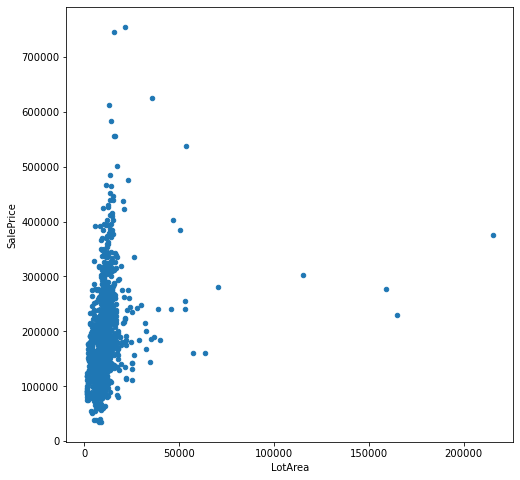

In [25]:
# Your code here - continuous numeric predictor
fig, ax = plt.subplots(figsize=(8,8))
ames.plot.scatter(x="LotArea", y="SalePrice", ax=ax)
#ax.set_xlim(0,75000), ax.set_ylim(0,550000)

### Discrete Numeric Predictor

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

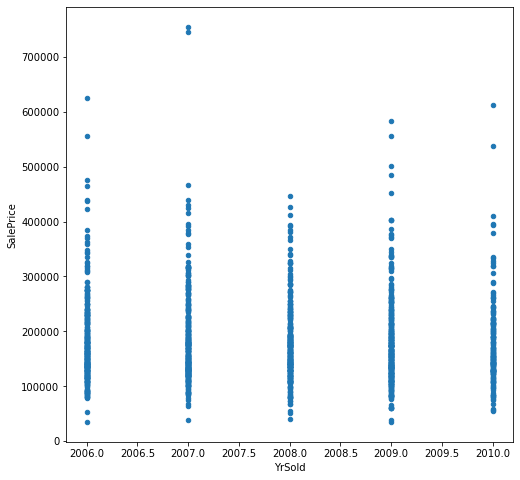

In [26]:
# Your code here - discrete numeric predictor
fig, ax = plt.subplots(figsize=(8,8))
ames.plot.scatter(x="YrSold", y="SalePrice", ax=ax)

### String Categorical Predictor

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64
MSZoning
C (all)    33791.092031
FV         52369.662067
RH         35714.118435
RL         80766.341319
RM         48521.689833
Name: SalePrice, dtype: float64


Text(0, 0.5, 'Average SalePrice (+/- 1 s.d.)')

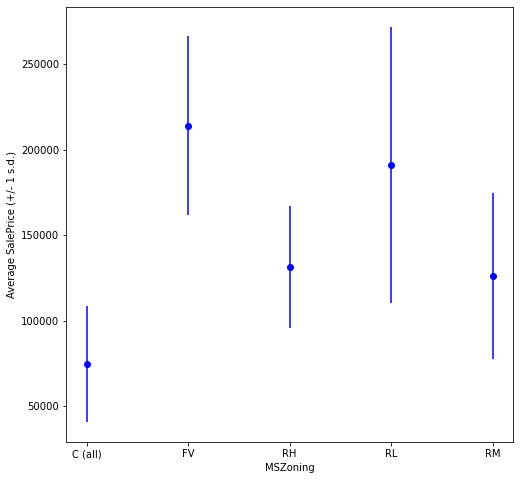

In [35]:
# Your code here - string categorical predictor
#ames.info()
ames_mean = ames.groupby('MSZoning')['SalePrice'].mean()
ames_std = ames.groupby('MSZoning')['SalePrice'].std()
print(ames_mean), print(ames_std)
fig, ax = plt.subplots(figsize=(8,8))
plt.errorbar(ames_mean.index, ames_mean, yerr=ames_std, color='b', fmt='o')
ax.set_xlabel('MSZoning')
ax.set_ylabel('Average SalePrice (+/- 1 s.d.)')

### Discrete Categorical Predictor

MSSubClass
20     185224.811567
30      95829.724638
40     156125.000000
45     108591.666667
50     143302.972222
60     239948.501672
70     166772.416667
75     192437.500000
80     169736.551724
85     147810.000000
90     133541.076923
120    200779.080460
160    138647.380952
180    102300.000000
190    129613.333333
Name: SalePrice, dtype: float64
MSSubClass
20      78782.189967
30      24857.110083
40      75747.799748
45      20231.723889
50      54851.983707
60      86579.909966
70      58206.545762
75     100556.762577
80      38197.808771
85      19629.942220
90      27833.249197
120     58221.490909
160     34587.542266
180     29474.282575
190     35439.097670
Name: SalePrice, dtype: float64


Text(0, 0.5, 'Average SalePrice (+/- 1 s.d.)')

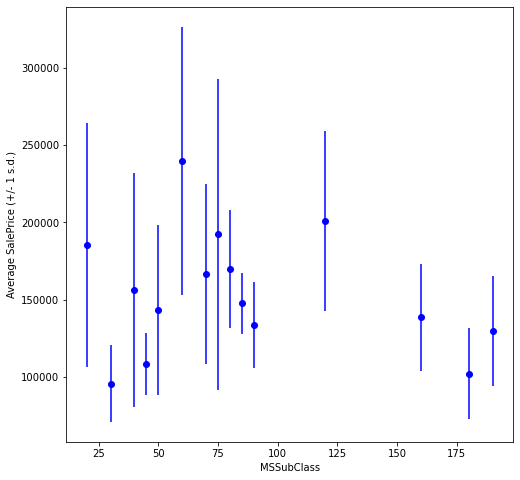

In [36]:
# Your code here - discrete categorical predictor
subclass_mean = ames.groupby('MSSubClass')['SalePrice'].mean()
subclass_std = ames.groupby('MSSubClass')['SalePrice'].std()
print(subclass_mean), print(subclass_std)
fig, ax = plt.subplots(figsize=(8,8))
plt.errorbar(subclass_mean.index, subclass_mean, yerr=subclass_std, color='b', fmt='o')
ax.set_xlabel('MSSubClass')
ax.set_ylabel('Average SalePrice (+/- 1 s.d.)')

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first!

In [43]:
# Your code here - prepare X and y, including one-hot encoding
ames_3pred = ames[["LotArea","MSZoning","MSSubClass"]].copy()
ames_X = pd.get_dummies(ames_3pred, columns=["MSZoning","MSSubClass"], drop_first=True)
ames_X

,LotArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
Id,,,,,,,,,,,,,,,,,,,
1,8450,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,9600,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11250,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,9550,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,14260,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,7917,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1457,13175,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1458,9042,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [44]:
# Your answer here - which category or categories were dropped?
print("We dropped the first column of each field, so we dropped MSZoning C (all) and MSSubClass_20.")

We dropped the first column of each field, so we dropped MSZoning C (all) and MSSubClass_20


In [46]:
# Your code here - build a regression model and display results
y = ames["SalePrice"]
X = ames_X

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     34.64
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.88e-103
Time:                        11:45:26   Log-Likelihood:                -18269.
No. Observations:                1460   AIC:                         3.658e+04
Df Residuals:                    1440   BIC:                         3.668e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8.838e+04   2.15e+04      4.

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

In [49]:
print(list(X.columns))

['LotArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190']


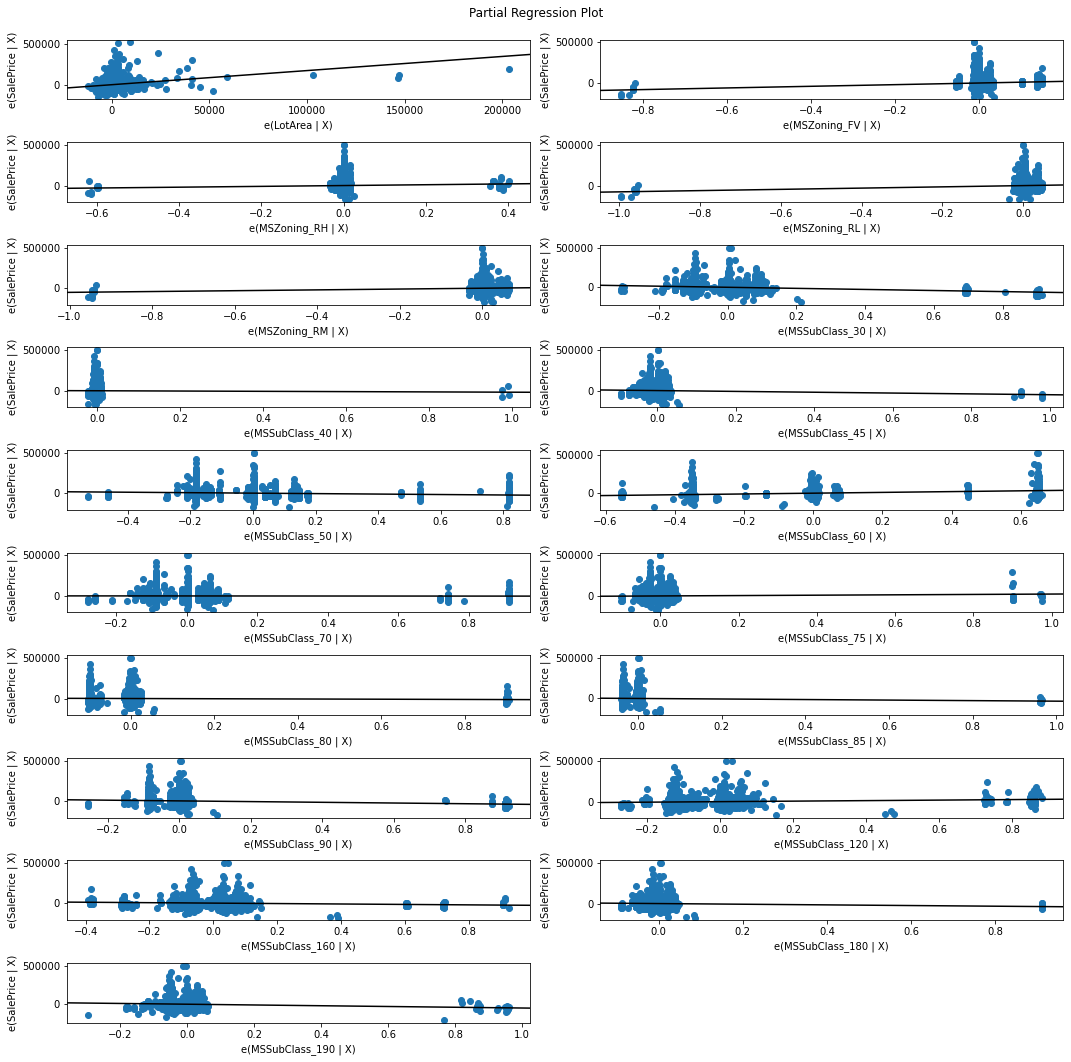

In [53]:
# Your code here - create partial regression plots
fig = plt.figure(figsize=(15,15))
sm.graphics.plot_partregress_grid(results, exog_idx=list(X.columns), fig=fig)
#plt.tight_layout()
plt.show()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [57]:
# Your code here - calculate an error-based metric
print("Adjusted r-squared: ", results.rsquared_adj)
print("Mean Absolute Error: ", results.resid.abs().sum() / len(y))
print("Root Mean Squared Error: ", ((results.resid ** 2).sum() / len(y)) ** 0.5)



Adjusted r-squared:  0.3046040776406085
Mean Absolute Error:  44826.407822331086
Root Mean Squared Error:  65792.10874006577


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [59]:
# Your answer here
print("This regression model only explains a little of the variance in SalePrice, with an adjusted r-squared value of 0.30. Many of the predictors have significant p-values, so I would retain them, but perhaps MSSubClass has too many classes. I would instead try replacing it with other predictor variables, while retaining LotSize and MSZoning predictors.")

This regression model only explains a little of the variance in SalePrice, with an adjusted r-squared value of 0.30. Many of the predictors have significant p-values, so I would retain them, but perhaps MSSubClass has too many classes. I would instead try replacing it with other predictor variables, while retaining LotSize and MSZoning predictors.


## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [71]:
# Your code here
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop="first", sparse=False)

data_cat = ames[["MSZoning"]].copy()
ohe.fit(data_cat)
ohe.transform(data_cat)

data_cat_ohe = pd.DataFrame(
    data=ohe.transform(data_cat),
    columns=[f"MSZoning_{cat}" for cat in ohe.categories_[0][1:]])

X_sklearn = pd.concat([ames[["LotArea"]], data_cat_ohe], axis=1)
y = ames["SalePrice"]

Xy = pd.concat([X_sklearn, y], axis=1)
Xy.dropna(inplace=True)
y = Xy["SalePrice"]
Xy.drop(columns=['SalePrice'], inplace=True)
print(y)
print(Xy)

sklearn_model = LinearRegression()
sklearn_model.fit(Xy, y)
sklearn_model.score(Xy, y)

1       208500.0
2       181500.0
3       223500.0
4       140000.0
5       250000.0
          ...   
1455    185000.0
1456    175000.0
1457    210000.0
1458    266500.0
1459    142125.0
Name: SalePrice, Length: 1459, dtype: float64
      LotArea  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM
1      8450.0          0.0          0.0          1.0          0.0
2      9600.0          0.0          0.0          1.0          0.0
3     11250.0          0.0          0.0          1.0          0.0
4      9550.0          0.0          0.0          1.0          0.0
5     14260.0          0.0          0.0          1.0          0.0
...       ...          ...          ...          ...          ...
1455   7500.0          0.0          0.0          1.0          0.0
1456   7917.0          0.0          0.0          1.0          0.0
1457  13175.0          0.0          0.0          1.0          0.0
1458   9042.0          0.0          0.0          1.0          0.0
1459   9717.0          0.0          0.0  

0.07326783245413515

## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.